In [13]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


# sample data set to test functions implementation
X = np.array([
 [1.84207953, 4.6075716 ],
 [5.65858312, 4.79996405],
 [6.35257892, 3.2908545 ],
 [2.90401653, 4.61220411],
 [3.23197916, 4.93989405],
 [1.24792268, 4.93267846],
 [1.97619886, 4.43489674],
 [2.23454135, 5.05547168],
 [2.98340757, 4.84046406],
 [2.97970391, 4.80671081],
 [2.11496411, 5.37373587],
 [2.12169543, 5.20854212],
 [1.5143529, 4.77003303],
])

print(X.shape)

(13, 2)


In [14]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    print(f"X shape: {X.shape}\n centroids shape: {centroids.shape}")

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            # calculates the distance of data point to each centroid
            norm_distance = np.linalg.norm(X[i] - centroids[j]) 
            distance.append(norm_distance)
            
        idx[i] = np.argmin(distance)

    
    return idx




In [15]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    for i in range(K):
        points = X[idx == i]
        
        centroids[i] = np.mean(points, axis=0)
       

    
    return centroids

In [16]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [18]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters)

# print(f"centroids: {centroids}\n idx: {idx}")

K-Means iteration 0/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 1/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 2/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 3/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 4/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 5/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 6/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 7/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 8/9
X shape: (13, 2)
 centroids shape: (3, 2)
K-Means iteration 9/9
X shape: (13, 2)
 centroids shape: (3, 2)


In [19]:
#Note: In practice, a good strategy for initializing the centroids 
#    is to select random examples from the training set

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="images/figure 2.png" width="500" height="500">

$^{2}$<sub>The provided photo used in this exercise belongs to Frank Wouters and is used with his permission.</sub>

<a name="4.1"></a>
### 4.1 Dataset

**Load image**

First, you will use `matplotlib` to read in the original image, as shown below.

In [21]:
# Load an image of a bird
original_img = plt.imread('images/bird_small.png')

(128, 128, 3)


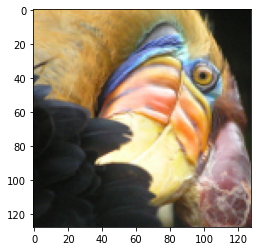

In [22]:
# Visualizing the image
print("Shape of original_img is:", original_img.shape)
plt.imshow(original_img)

In [23]:
#Note: before calling run_kMeans, you need to first transform
#     the matrix original_img into a two-dimensional matrix

# The code below reshapes the matrix original_img to create 
# an  𝑚×3  matrix of pixel colors (where  𝑚=16384=128×128 )


# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [24]:
# Run your K-Means algorithm on this data
# try different values of K and max_iters to alter compression
K = 16                        
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 1/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 2/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 3/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 4/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 5/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 6/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 7/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 8/9
X shape: (16384, 3)
 centroids shape: (16, 3)
K-Means iteration 9/9
X shape: (16384, 3)
 centroids shape: (16, 3)


In [25]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [10 14 14 10 10]


After finding the top $K=16$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows you to represent the original image using the centroid assignments of each pixel. 
* Notice that you have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [26]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

<img src="images/figure 3.png" width="700" height="700">

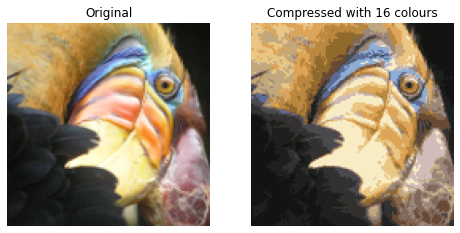

In [27]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()